In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
mb = pd.read_csv('/content/MariBisnisFix.csv')
mb

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7831800460,20140502T000000,235000,2,1,1210,9400,1,0,0,2,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
1,2618300080,20140502T000000,242500,3,2,1200,9720,1,0,0,4,7,1200,0,1965,0,98042,47.4225,-122.153,1380,10284
2,2011000010,20140502T000000,257950,3,2,1370,5858,1,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500
3,7399300120,20140502T000000,260000,4,2,1480,8625,1,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502
4,3328500250,20140502T000000,285000,4,3,2200,9397,2,0,0,3,8,2200,0,1987,0,98001,47.3406,-122.269,2310,9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,6815100380,20150514T000000,855000,3,2,1900,4000,1,0,0,3,7,1300,600,1965,0,98103,47.6854,-122.331,1880,4000
15439,9178601660,20150514T000000,1695000,5,3,3320,5354,2,0,0,3,9,3320,0,2004,0,98103,47.6542,-122.331,2330,4040
15440,7923600250,20150515T000000,450000,5,2,1870,7344,2,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
15441,5101400871,20150524T000000,445500,2,2,1390,6670,1,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [3]:
mb['date'] = mb['date'].str[:8].apply(lambda x: datetime.datetime.strptime(x, "%Y%m%d"))
mb.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7831800460,2014-05-02,235000,2,1,1210,9400,1,0,0,2,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
1,2618300080,2014-05-02,242500,3,2,1200,9720,1,0,0,4,7,1200,0,1965,0,98042,47.4225,-122.153,1380,10284
2,2011000010,2014-05-02,257950,3,2,1370,5858,1,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500
3,7399300120,2014-05-02,260000,4,2,1480,8625,1,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502
4,3328500250,2014-05-02,285000,4,3,2200,9397,2,0,0,3,8,2200,0,1987,0,98001,47.3406,-122.269,2310,9176


In [4]:
mb.loc[mb['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2540,2402100895,2014-06-25,640000,33,2,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [5]:
mb['bedrooms'] = mb['bedrooms'].replace(33,3)

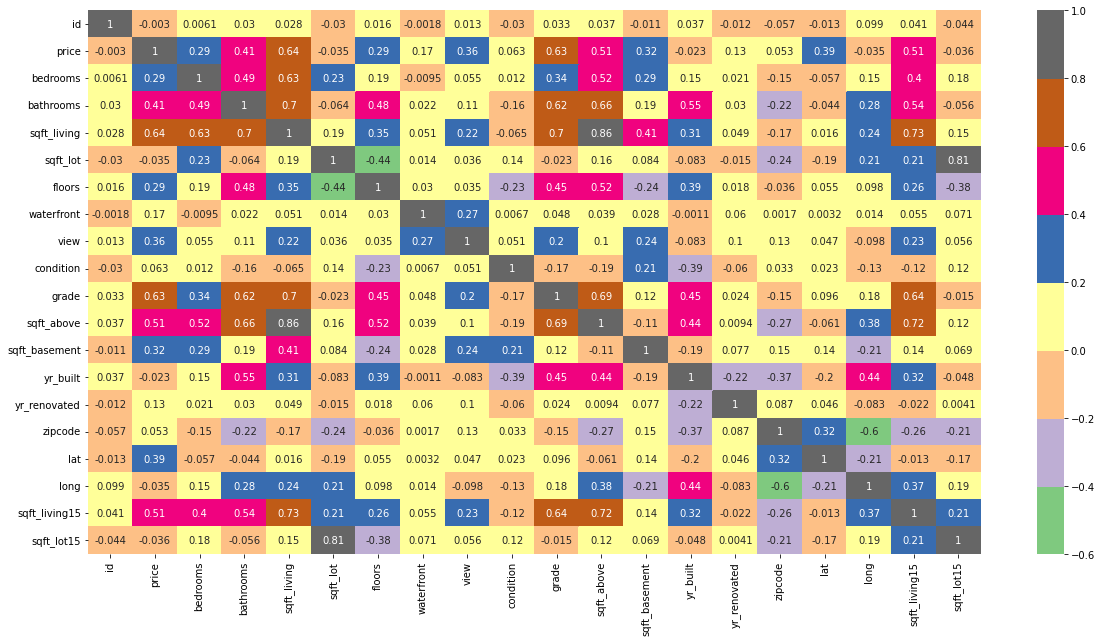

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize =(20,10))
cor = mb.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('heatmap_bisnis.jpg')

In [6]:
mb.corr().style.background_gradient().set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.00,0.01,0.03,0.03,-0.03,0.02,-0.00,0.01,-0.03,0.03,0.04,-0.01,0.04,-0.01,-0.06,-0.01,0.10,0.04,-0.04
price,-0.00,1.00,0.29,0.41,0.64,-0.04,0.29,0.17,0.36,0.06,0.63,0.51,0.32,-0.02,0.13,0.05,0.39,-0.04,0.51,-0.04
bedrooms,0.01,0.29,1.00,0.49,0.63,0.23,0.19,-0.01,0.06,0.01,0.34,0.52,0.29,0.15,0.02,-0.15,-0.06,0.15,0.40,0.18
bathrooms,0.03,0.41,0.49,1.00,0.70,-0.06,0.48,0.02,0.11,-0.16,0.62,0.66,0.19,0.55,0.03,-0.22,-0.04,0.28,0.54,-0.06
sqft_living,0.03,0.64,0.63,0.70,1.00,0.19,0.35,0.05,0.22,-0.06,0.70,0.86,0.41,0.31,0.05,-0.17,0.02,0.24,0.73,0.15
sqft_lot,-0.03,-0.04,0.23,-0.06,0.19,1.00,-0.44,0.01,0.04,0.14,-0.02,0.16,0.08,-0.08,-0.01,-0.24,-0.19,0.21,0.21,0.81
floors,0.02,0.29,0.19,0.48,0.35,-0.44,1.00,0.03,0.03,-0.23,0.45,0.52,-0.24,0.39,0.02,-0.04,0.06,0.10,0.26,-0.38
waterfront,-0.00,0.17,-0.01,0.02,0.05,0.01,0.03,1.00,0.27,0.01,0.05,0.04,0.03,-0.00,0.06,0.00,0.00,0.01,0.06,0.07
view,0.01,0.36,0.06,0.11,0.22,0.04,0.03,0.27,1.00,0.05,0.20,0.10,0.24,-0.08,0.10,0.13,0.05,-0.10,0.23,0.06
condition,-0.03,0.06,0.01,-0.16,-0.06,0.14,-0.23,0.01,0.05,1.00,-0.17,-0.19,0.21,-0.39,-0.06,0.03,0.02,-0.13,-0.12,0.12


In [7]:
mb.values

array([[7831800460, Timestamp('2014-05-02 00:00:00'), 235000, ...,
        -122.36, 1580, 6026],
       [2618300080, Timestamp('2014-05-02 00:00:00'), 242500, ...,
        -122.15299999999999, 1380, 10284],
       [2011000010, Timestamp('2014-05-02 00:00:00'), 257950, ...,
        -122.31299999999999, 1400, 7500],
       ...,
       [7923600250, Timestamp('2015-05-15 00:00:00'), 450000, ...,
        -122.14399999999999, 1870, 7650],
       [5101400871, Timestamp('2015-05-24 00:00:00'), 445500, ...,
        -122.30799999999999, 920, 6380],
       [9106000005, Timestamp('2015-05-27 00:00:00'), 1310000, ...,
        -122.303, 2170, 4590]], dtype=object)

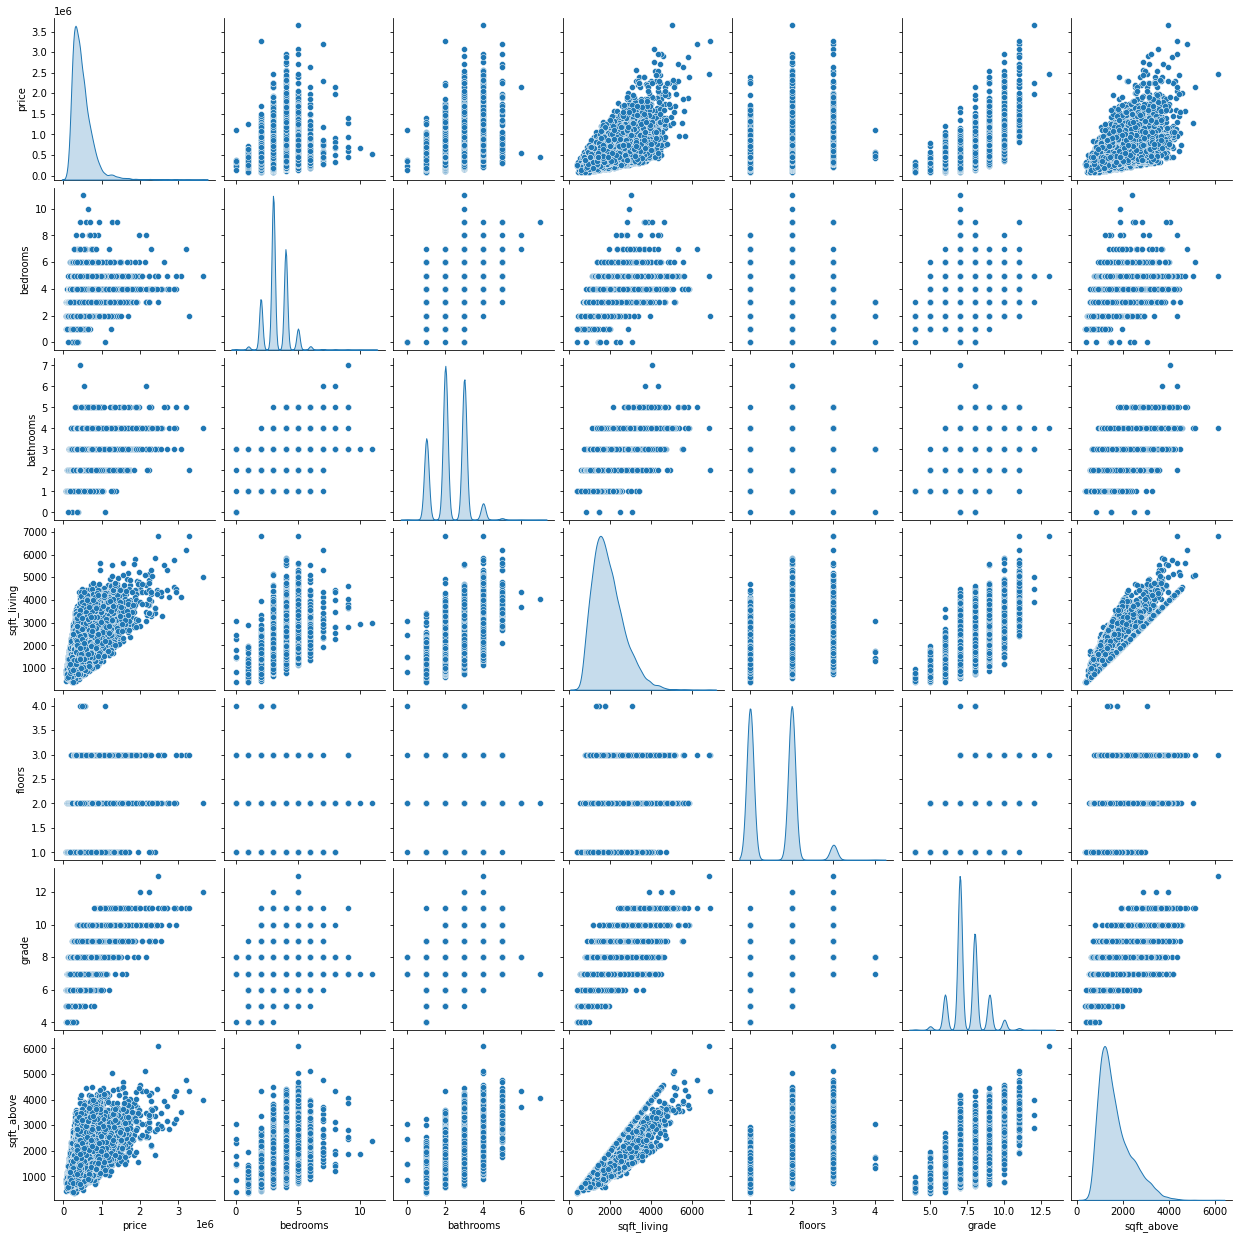

In [8]:
data = mb[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above']]

sns.pairplot(data=data, diag_kind='kde')

In [9]:
mb.to_csv('MariBisnisFixs.csv', index=False)

## Feature Selection

In [25]:
mb = pd.read_csv('/content/MariBisnisFixs.csv', usecols=['price','bedrooms', 'bathrooms', 'floors', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], sep=',')
mb

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15
0,235000,2,1,1210,1,6,1210,1580
1,242500,3,2,1200,1,7,1200,1380
2,257950,3,2,1370,1,7,1370,1400
3,260000,4,2,1480,1,7,1480,2130
4,285000,4,3,2200,2,8,2200,2310
...,...,...,...,...,...,...,...,...
15438,855000,3,2,1900,1,7,1300,1880
15439,1695000,5,3,3320,2,9,3320,2330
15440,450000,5,2,1870,2,7,1870,1870
15441,445500,2,2,1390,1,6,720,920


In [26]:
mb.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
grade            0
sqft_above       0
sqft_living15    0
dtype: int64

In [12]:
mb.iloc[0:15443]

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above
0,235000,2,1,1210,1,6,1210
1,242500,3,2,1200,1,7,1200
2,257950,3,2,1370,1,7,1370
3,260000,4,2,1480,1,7,1480
4,285000,4,3,2200,2,8,2200
...,...,...,...,...,...,...,...
15438,855000,3,2,1900,1,7,1300
15439,1695000,5,3,3320,2,9,3320
15440,450000,5,2,1870,2,7,1870
15441,445500,2,2,1390,1,6,720


In [ ]:
np_array = mb.to_numpy()

In [ ]:
mb.values

array([[ 235000,       2,       1,    1210,       1,       6],
       [ 242500,       3,       2,    1200,       1,       7],
       [ 257950,       3,       2,    1370,       1,       7],
       ...,
       [ 450000,       5,       2,    1870,       2,       7],
       [ 445500,       2,       2,    1390,       1,       6],
       [1310000,       4,       2,    3750,       2,       8]])

## Regresi

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

mb_ml = mb

In [28]:
scaler = MinMaxScaler()
scaler.fit(mb_ml)
scaled_data = scaler.transform(mb_ml)
scaled_data = pd.DataFrame(scaled_data, columns=mb_ml.columns)
scaled_data.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15
0,0.043417,0.181818,0.142857,0.129830,0.000000,0.222222,0.146341,0.249443
1,0.045518,0.272727,0.285714,0.128284,0.000000,0.333333,0.144599,0.204900
2,0.049846,0.272727,0.285714,0.154560,0.000000,0.333333,0.174216,0.209354
3,0.050420,0.363636,0.285714,0.171561,0.000000,0.333333,0.193380,0.371938
4,0.057423,0.363636,0.428571,0.282844,0.333333,0.444444,0.318815,0.412027


In [29]:
x = scaled_data[['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
y = scaled_data['price']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
lr.score(x_train,y_train) # train-set score

0.5140417963500137

In [41]:
lr.score(x_test,y_test) # test-set score

0.5265732953943691

In [42]:
y_pred_lr = lr.predict(x_test) # prediction 

In [43]:
print('R2 score',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_pred_lr,y_test))
print('MSE', mean_squared_error(y_test, y_pred_lr))
print('RMSE', sqrt(mean_squared_error(y_test, y_pred_lr)))

R2 score 0.5265732953943691
MAE 0.0375746772744829
MSE 0.0028019785737968795
RMSE 0.05293371868475594
